# **Customer Payment and Preference Analysis**

In today's competitive business environment, understanding customer preferences and payment behavior is essential for optimizing revenue streams and enhancing customer satisfaction. This analysis focuses on identifying key payment trends and their impact on revenue generation in the context of a retail or service-based business. Specifically, the study aims to analyze transaction data to uncover the following:

1. **Most Frequently Used Payment Methods per Outlet**  
   By identifying the most popular payment methods (e.g., cash, non-cash, or Barberking Pay), this analysis seeks to understand customer preferences across different outlets. This insight can help businesses streamline operations, tailor promotional strategies, and improve payment accessibility.

2. **Average Revenue per Transaction by Payment Method per Outlet**  
   Evaluating the average revenue generated per transaction for each payment method provides an understanding of which payment methods are most profitable. By analyzing these metrics, businesses can identify opportunities to maximize revenue and design incentives to encourage the use of higher-revenue payment options.

### **Objectives**
- To determine the most preferred payment methods used by customers across various outlets.
- To compare the average revenue per transaction based on payment methods and analyze factors contributing to differences in performance.
- To provide actionable insights for improving payment policies and customer engagement strategies.

### **Scope of Analysis**
This analysis focuses on transactional data where each unique **OrderNo** represents one customer transaction. The analysis spans multiple outlets and covers payment types including **cash**, **non-cash**, and **Barberking Pay**. The study avoids the deletion of duplicate entries for transactions, ensuring data integrity and accuracy in identifying customer behavior.

### **Significance of Analysis**
Understanding payment preferences and their impact on revenue is critical for:
- Enhancing operational efficiency by aligning resources with customer habits.
- Designing targeted promotional campaigns based on payment trends.
- Identifying and addressing potential barriers to the adoption of specific payment methods.

By leveraging SQL for database querying and Python for advanced data visualization and analysis, this study provides a comprehensive overview of customer payment behavior and revenue dynamics. The findings will be instrumental in shaping data-driven strategies for improved business performance and customer satisfaction.

In [1]:
import pandas as pd
from pandasql import sqldf

#load dataset
data = pd.read_csv ('/kaggle/input/salesbk/SALESBK.csv')
#define lamba function to run query
sql = lambda q: sqldf(q, globals())

In [2]:
#query1 Identify the Most Frequently Used Payment Method per Outlet
query1= """
SELECT Outlet,
    PaymentType,
    COUNT(DISTINCT OrderNo) AS Transaction_Freq
FROM data
GROUP BY Outlet, PaymentType
ORDER BY Outlet, Transaction_Freq DESC;
"""
#run query1
most_payment=sql(query1)
#show result
print('Most Frequently Used Payment Method per Outlet')
print(most_payment)

Most Frequently Used Payment Method per Outlet
               Outlet     PaymentType  Transaction_Freq
0         BK01 - ATMI            Cash               444
1         BK01 - ATMI       Non Tunai               339
2         BK01 - ATMI  Barberking Pay               111
3        BK05 - JAKAL       Non Tunai               482
4        BK05 - JAKAL            Cash               250
5        BK05 - JAKAL  Barberking Pay                62
6   BK07 - GAJAH MADA            Cash               392
7   BK07 - GAJAH MADA       Non Tunai               349
8   BK07 - GAJAH MADA  Barberking Pay               107
9     BK09 - PLEBURAN       Non Tunai               417
10    BK09 - PLEBURAN            Cash               264
11    BK09 - PLEBURAN  Barberking Pay               107
12      BK16 - GENTAN       Non Tunai               348
13      BK16 - GENTAN            Cash               342
14      BK16 - GENTAN  Barberking Pay               172


In [3]:
#query2 Average Income per Transaction by Payment Method per Outlet
query2="""
SELECT Outlet,
    PaymentType,
    AVG(Amount) AS Transaction_AVG
FROM data
GROUP BY Outlet, PaymentType
ORDER BY Outlet, Transaction_AVG DESC;
"""
#run query2
AVG_Income=sql(query2)
#show result
print('Average Income per Transaction by Payment Method per Outlet')
print(AVG_Income)

Average Income per Transaction by Payment Method per Outlet
               Outlet     PaymentType  Transaction_AVG
0         BK01 - ATMI       Non Tunai     49899.408284
1         BK01 - ATMI  Barberking Pay     47173.553719
2         BK01 - ATMI            Cash     41678.175092
3        BK05 - JAKAL  Barberking Pay     45513.333333
4        BK05 - JAKAL       Non Tunai     43988.011988
5        BK05 - JAKAL            Cash     41685.416667
6   BK07 - GAJAH MADA       Non Tunai     49993.084371
7   BK07 - GAJAH MADA            Cash     42722.222222
8   BK07 - GAJAH MADA  Barberking Pay     38596.875000
9     BK09 - PLEBURAN            Cash     41311.233886
10    BK09 - PLEBURAN       Non Tunai     41301.705757
11    BK09 - PLEBURAN  Barberking Pay     38558.139535
12      BK16 - GENTAN            Cash     46649.916248
13      BK16 - GENTAN       Non Tunai     43621.417798
14      BK16 - GENTAN  Barberking Pay     40392.207792


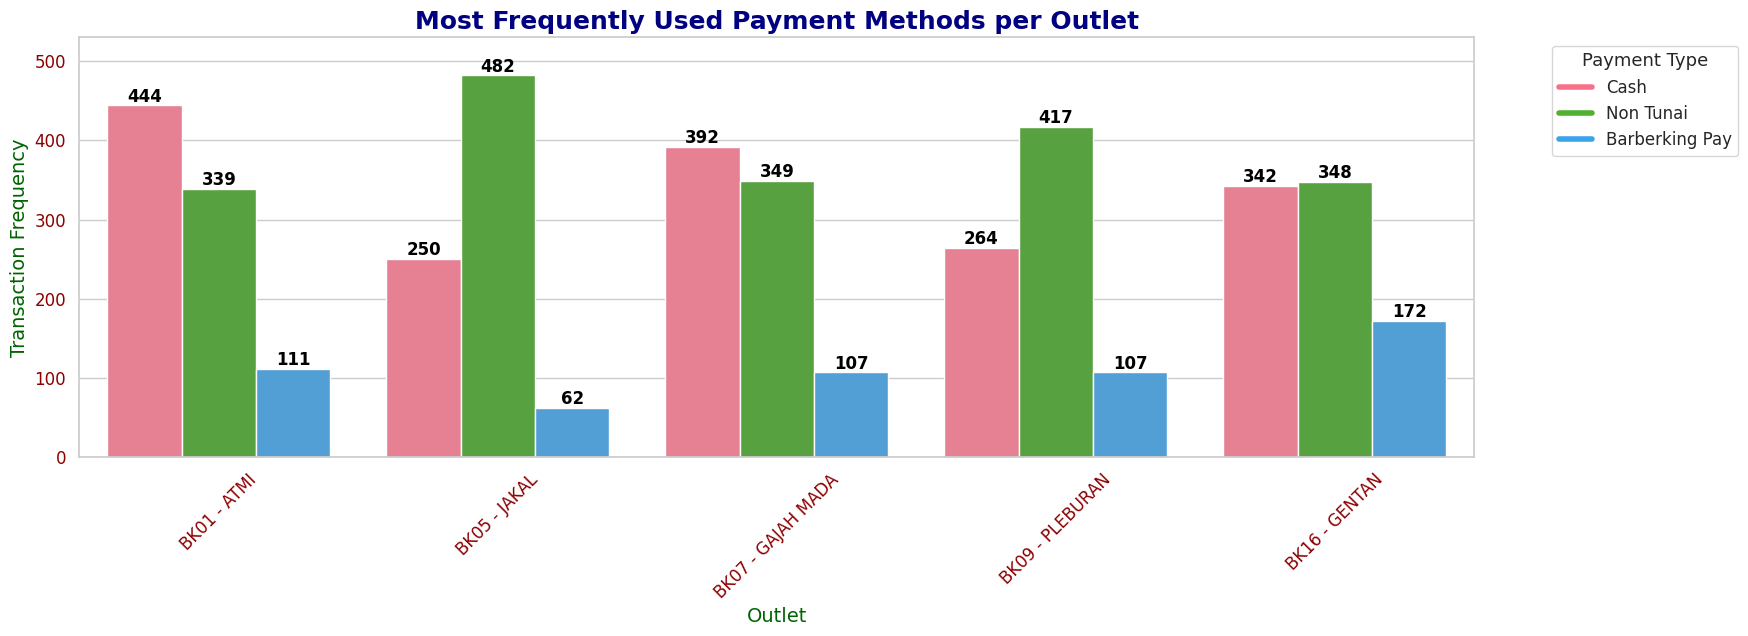

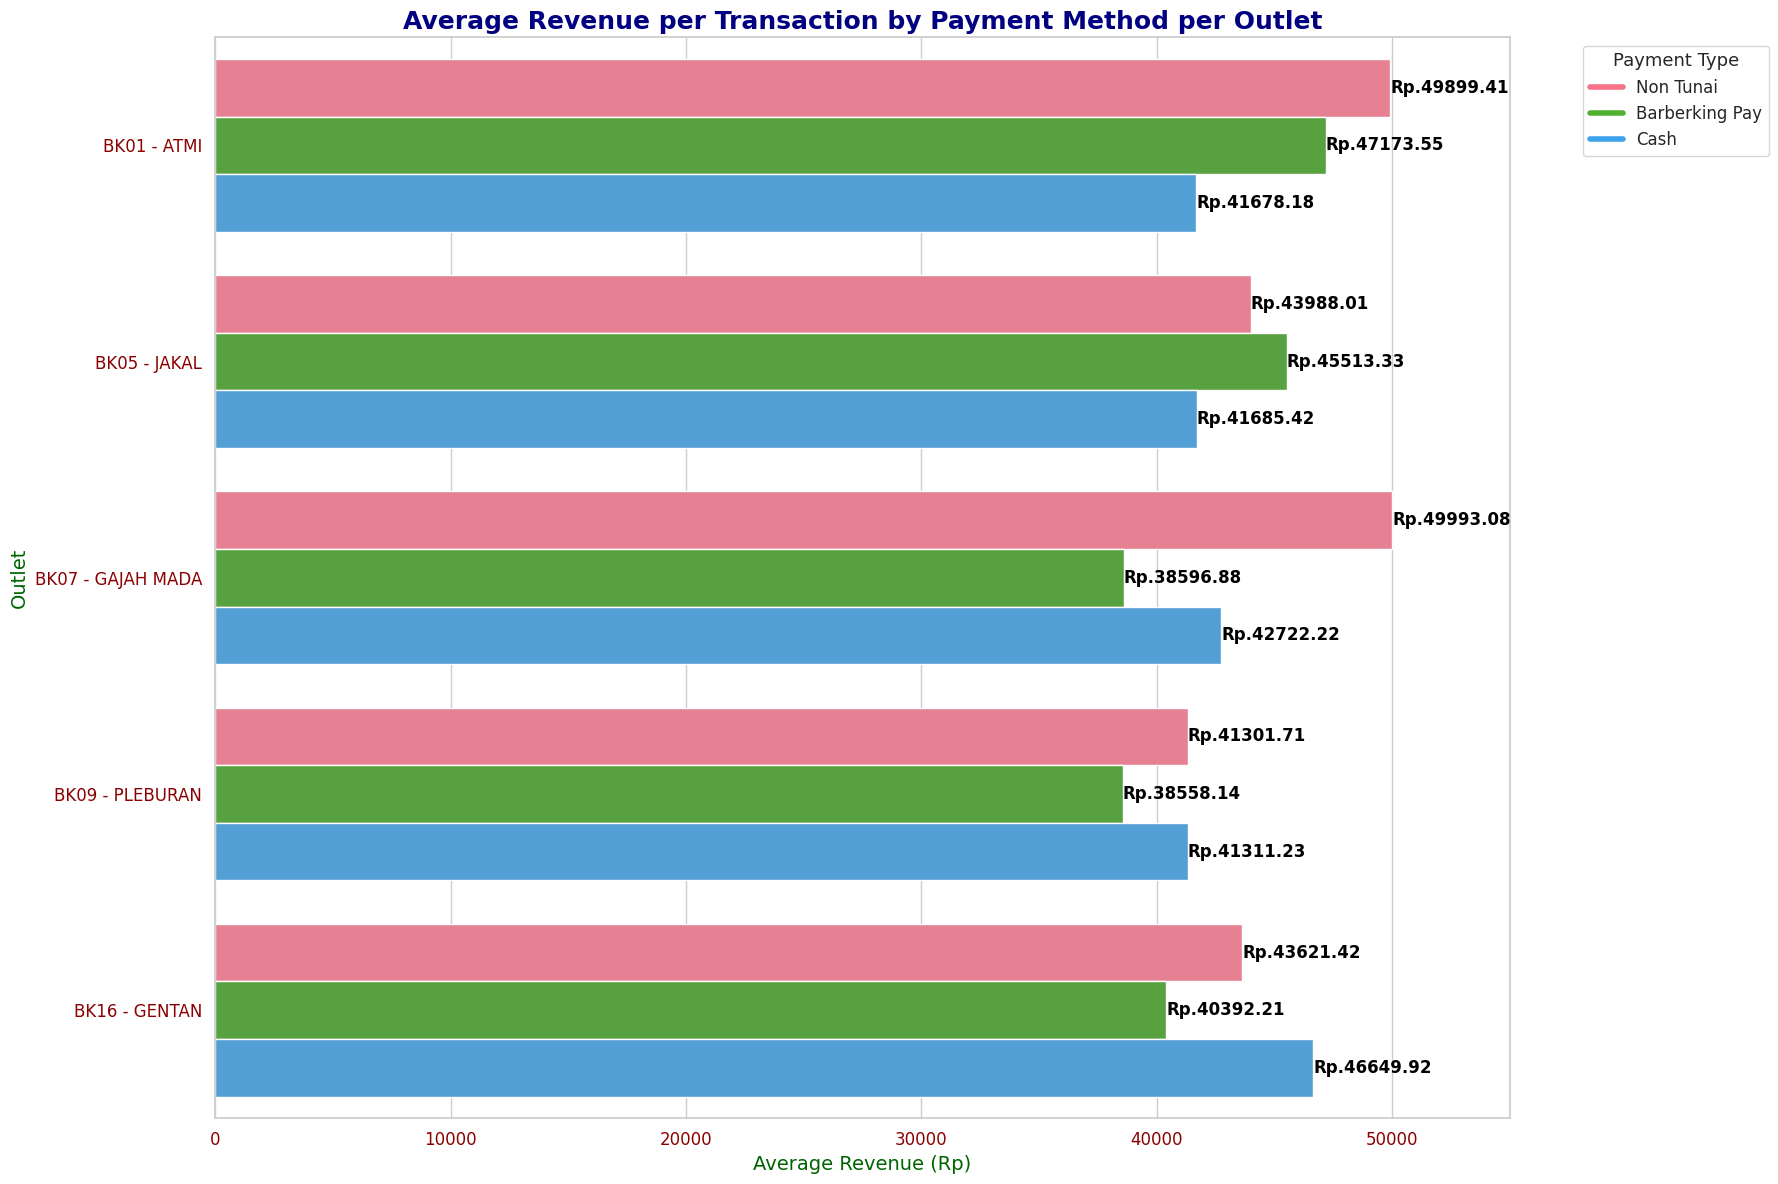

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the overall aesthetics
sns.set(style='whitegrid')

# Define a more vibrant color palette
color_palette = sns.color_palette("husl", n_colors=len(most_payment['PaymentType'].unique()))

# Set up the figure with larger size
plt.figure(figsize=(18, 12))

# Create a bar plot for Most Frequently Used Payment Methods
plt.subplot(2, 1, 1)
bar_plot1 = sns.barplot(data=most_payment, x='Outlet', y='Transaction_Freq', hue='PaymentType', palette=color_palette)
plt.title('Most Frequently Used Payment Methods per Outlet', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Outlet', fontsize=14, color='darkgreen')
plt.ylabel('Transaction Frequency', fontsize=14, color='darkgreen')
plt.xticks(rotation=45, fontsize=12, color='darkred')
plt.yticks(fontsize=12, color='darkred')
plt.ylim(0, most_payment['Transaction_Freq'].max() * 1.1)  # Adjust the y-axis limit

# Add legend for payment types
legend_elements = [plt.Line2D([0], [0], color=color, lw=4, label=payment_type) for payment_type, color in zip(most_payment['PaymentType'].unique(), color_palette)]
plt.legend(handles=legend_elements, title='Payment Type', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12, title_fontsize='13')

# Add data labels on top of the bars
for p in bar_plot1.patches:
    bar_plot1.annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Create a new figure for Average Revenue per Transaction
plt.figure(figsize=(18, 12))

# Create a horizontal bar plot for Average Revenue per Transaction
plt.subplot(1, 1, 1)
bar_plot2 = sns.barplot(data=AVG_Income, y='Outlet', x='Transaction_AVG', hue='PaymentType', palette=color_palette)
plt.title('Average Revenue per Transaction by Payment Method per Outlet', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Average Revenue (Rp)', fontsize=14, color='darkgreen')
plt.ylabel('Outlet', fontsize=14, color='darkgreen')
plt.xticks(fontsize=12, color='darkred')
plt.yticks(fontsize=12, color='darkred')
plt.xlim(0, AVG_Income['Transaction_AVG'].max() * 1.1)  # Adjust the x-axis limit

# Add legend for payment types
legend_elements = [plt.Line2D([0], [0], color=color, lw=4, label=payment_type) for payment_type, color in zip(AVG_Income['PaymentType'].unique(), color_palette)]
plt.legend(handles=legend_elements, title='Payment Type', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12, title_fontsize='13')

# Add data labels on top of the bars (now placed at the end of each bar)
for p in bar_plot2.patches:
    bar_plot2.annotate(f'Rp.{p.get_width():.2f}',  # Use get_width() for horizontal bars
                       (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                       ha='left', va='center', fontsize=12, color='black', weight='bold')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



### **Most Frequently Used Payment Method per Outlet**
This table provides insight into customer preferences for payment methods across different outlets. For each outlet, you're able to see how many times each payment method was used. 

- **BK01 - ATMI** has the highest frequency for **Cash** (444 transactions), followed by **Non Tunai** (339) and **Barberking Pay** (111). 
- **BK05 - JAKAL** shows a similar trend, with **Non Tunai** being the most frequent method (482), followed by **Cash** (250) and **Barberking Pay** (62). 

**Key Insights:**
- **Cash** seems to be the most frequently used payment method in outlets like **BK01 - ATMI** and **BK07 - GAJAH MADA**.
- **Non Tunai** (non-cash) is most popular in **BK05 - JAKAL** and **BK09 - PLEBURAN**.

### **Average Income per Transaction by Payment Method per Outlet**
This table shows the average transaction value for each payment method across the different outlets.

- **BK01 - ATMI** has the highest average transaction amount for **Non Tunai** (49,899.41), followed by **Barberking Pay** (47,173.55), and **Cash** (41,678.18).
- In **BK05 - JAKAL**, **Barberking Pay** has a higher average transaction value (45,513.33) compared to **Non Tunai** (43,988.01) and **Cash** (41,685.42).
- **BK09 - PLEBURAN** shows a smaller variance in average transaction amounts across the three payment methods, with **Cash** and **Non Tunai** being almost equal (41,311.23 vs. 41,301.71), and **Barberking Pay** showing slightly lower (38,558.14).

**Key Insights:**
- **Non Tunai** tends to have the highest average income per transaction in most outlets, indicating that customers using this method are likely spending more.
- **Barberking Pay** has competitive average transaction values, though slightly lower than **Non Tunai** in some outlets.
- **Cash** payments, while frequent in certain outlets, often result in lower average transaction amounts.

### **Analysis and Insights**
1. **Payment Method Popularity vs Revenue:**
   - While **Cash** is often the most frequent payment method, **Non Tunai** (non-cash) generally generates higher revenue per transaction. This suggests that although customers are using cash more frequently, they are spending less per transaction compared to those using non-cash options.
   
2. **Actionable Insights for Business Strategy:**
   - **Incentivize Non Tunai**: Given that **Non Tunai** generally yields higher average revenue, businesses might consider promoting non-cash options through incentives (e.g., discounts or loyalty rewards) to increase their adoption.
   - **Encourage Barberking Pay**: Even though **Barberking Pay** is less frequent, it shows competitive transaction values. You could implement targeted campaigns to increase its usage, possibly with exclusive benefits for customers paying via this method.
   - **Optimize Cash Handling**: While **Cash** remains popular, businesses should streamline cash transaction processes to ensure operational efficiency, especially in outlets where **Cash** is the dominant method.